<a href="https://colab.research.google.com/github/duraichellam001-tech/EV-PhysicsCalib-Model/blob/main/notebooks/02_data_verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, random, glob

# Paths
from google.colab import drive
drive.mount('/content/drive')

dataset_dir = "/content/drive/My Drive/Colab Notebooks/ev-cal-estim-model/data"
meta_path = os.path.join(dataset_dir, "metadata.csv")

Mounted at /content/drive


In [3]:
meta = pd.read_csv(meta_path)
print("✅ Loaded metadata.csv")
print("Total cycles:", len(meta))
print("\nSample:")
display(meta.head())

✅ Loaded metadata.csv
Total cycles: 560

Sample:


,cycle_id,file,type,base_cycle,mean_v,max_v,mean_P_kW,max_P_kW
0,0,udds_aug_0000.csv,real_aug,udds,9.244584,26.932034,5.425529,35.594785
1,1,udds_aug_0001.csv,real_aug,udds,7.012971,20.464524,3.621356,22.037072
2,2,udds_aug_0002.csv,real_aug,udds,7.977907,23.267094,4.366124,30.295798
3,3,udds_aug_0003.csv,real_aug,udds,8.605813,25.017534,5.720377,36.586182
4,4,udds_aug_0004.csv,real_aug,udds,10.390411,30.230615,6.631206,47.103664


In [4]:
print("\nSummary by type:")
display(meta.groupby('type')[['mean_v','mean_P_kW']].describe().round(2))


Summary by type:


mean_v                                               mean_P_kW  \
           count   mean   std   min   25%    50%    75%    max     count   
type                                                                       
real_aug   210.0  17.37  6.49  7.01  9.81  19.52  22.82  25.85     210.0   
synthetic  350.0  13.37  4.34  7.01  7.89  12.76  17.71  19.84     350.0   

                                                         
            mean   std   min   25%    50%    75%    max  
type                                                     
real_aug   11.28  6.01  3.03  5.79  10.83  15.16  28.54  
synthetic   7.82  3.92  1.98  3.75   7.11  11.59  17.55

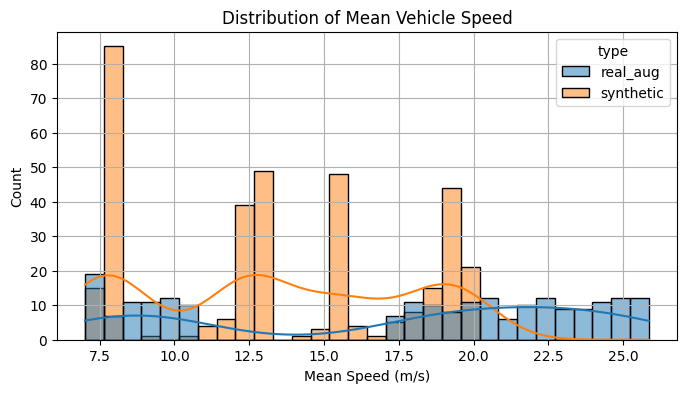

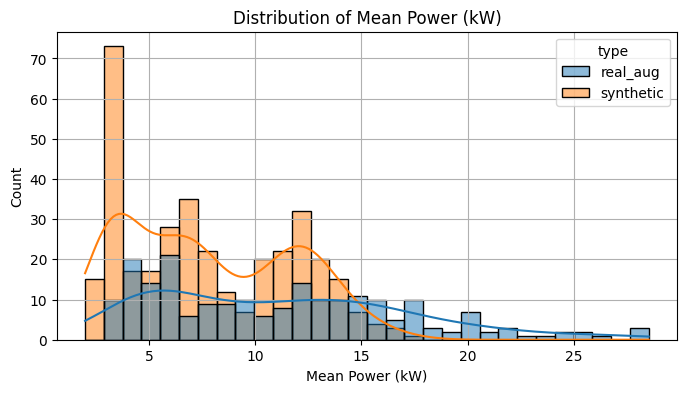

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(data=meta, x='mean_v', hue='type', kde=True, bins=30)
plt.title("Distribution of Mean Vehicle Speed")
plt.xlabel("Mean Speed (m/s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=meta, x='mean_P_kW', hue='type', kde=True, bins=30)
plt.title("Distribution of Mean Power (kW)")
plt.xlabel("Mean Power (kW)")
plt.grid(True)
plt.show()

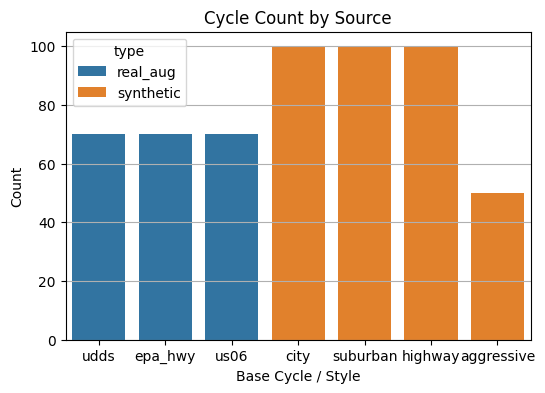

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=meta, x='base_cycle', hue='type')
plt.title("Cycle Count by Source")
plt.ylabel("Count")
plt.xlabel("Base Cycle / Style")
plt.grid(True, axis='y')
plt.show()

Randomly selected: ['epa_hwy_aug_0075.csv', 'highway_0424.csv', 'udds_aug_0054.csv']


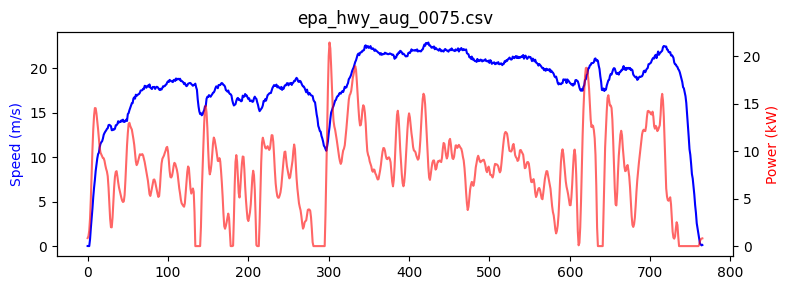

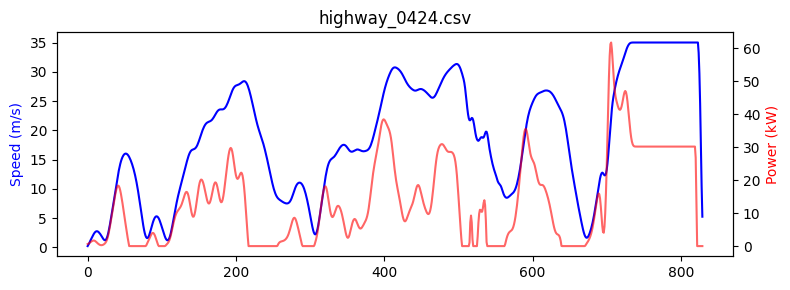

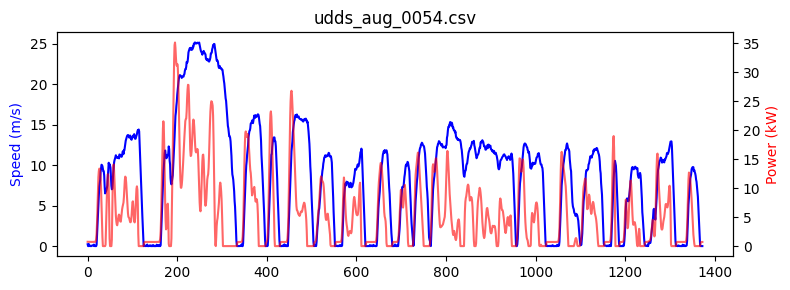

In [10]:
sample_files = random.sample(list(meta['file']), 3)
print("Randomly selected:", sample_files)

for f in sample_files:
    file_path = os.path.join(dataset_dir, f)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        plt.figure(figsize=(8,3))
        ax1 = plt.gca()
        ax1.plot(df['time_s'], df['v_mps'], 'b', label='Speed (m/s)')
        ax1.set_ylabel('Speed (m/s)', color='b')
        ax2 = ax1.twinx()
        ax2.plot(df['time_s'], df['P_meas_W']/1000, 'r', alpha=0.6, label='Power (kW)')
        ax2.set_ylabel('Power (kW)', color='r')
        plt.title(f"{f}")
        plt.tight_layout()
        plt.show()